In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [10]:
stud_perf=pd.read_csv('StudentsPerformance (1).csv')
stud_perf.head()

FileNotFoundError: [Errno 2] No such file or directory: 'StudentsPerformance (1).csv'

In [6]:
stud_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
stud_perf.describe()

NameError: name 'stud_perf' is not defined

In [8]:
stud_perf['Total marks']=stud_perf['math score']+stud_perf['reading score']+stud_perf['writing score']

In [9]:
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [11]:
stud_perf.head()

,math score,reading score,writing score,Total marks,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,True,False,True,False,False,False,False,False,True,False,True,True


In [13]:
stud_perf=pd.get_dummies(stud_perf, drop_first=True)
stud_perf=stud_perf.astype(int)
stud_perf.head()


,math score,reading score,writing score,Total marks,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,247,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,278,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,148,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,229,1,0,1,0,0,0,0,0,1,0,1,1


In [14]:
stud_perf.head()


,math score,reading score,writing score,Total marks,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,247,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,278,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,148,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,229,1,0,1,0,0,0,0,0,1,0,1,1


In [15]:
from sklearn.model_selection import train_test_split #for spliting the data
from sklearn import metrics #for evaluation of the model

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
from sklearn.linear_model import LassoLarsCV

In [16]:
X=stud_perf.drop(['Total marks'], axis=1)
y=stud_perf['Total marks']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
# create a linear regression object
LR = LinearRegression()
# fit the model
LR.fit(X_train, y_train)
# predict the values for test data
predictions = LR.predict(X_test)

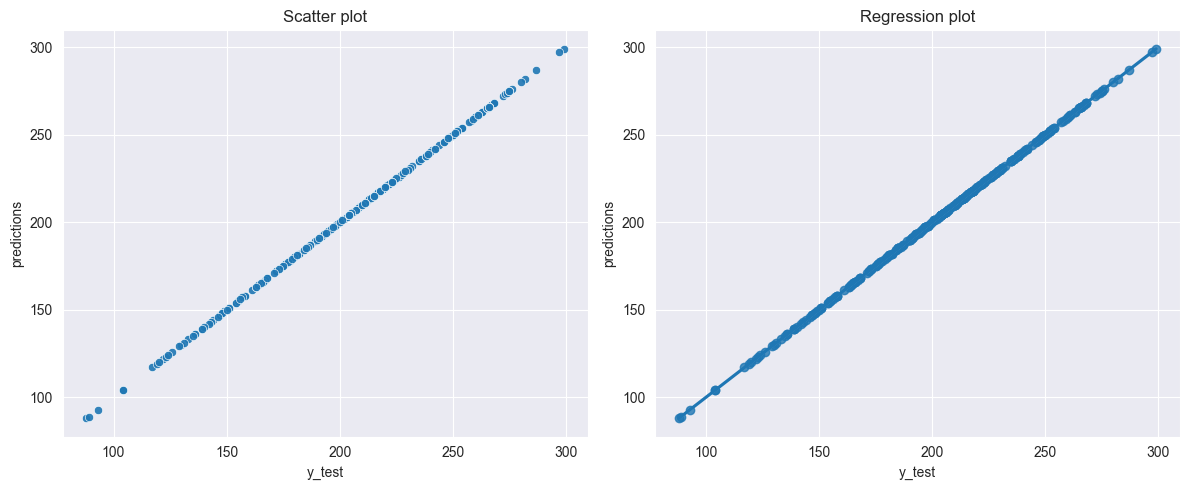

In [19]:
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=predictions, alpha=0.9);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Scatter plot')

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Regression plot')

plt.tight_layout()
plt.show()

In [20]:
print('The regression score on training data : {}'.format(LR.score(X_train, y_train)))
print('The regression score on testing data : {}'.format(LR.score(X_test, y_test)))
print('\n')
print('The Mean absolute error:', metrics.mean_absolute_error(y_test, predictions))
print('The mean squared error:', metrics.mean_squared_error(y_test, predictions))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

The regression score on training data : 1.0
The regression score on testing data : 1.0


The Mean absolute error: 2.7426949600339866e-14
The mean squared error: 1.0481121531128452e-27
The root mean squared error: 3.237456027674886e-14


In [1]:
stud_perf2=stud_perf.drop('Total marks', axis=1)
sns.set_style("darkgrid")
for i in ['math score', 'reading score', 'writing score']:
    X_train, X_test, y_train, y_test = train_test_split(stud_perf2.drop([i], axis=1), stud_perf2[i], test_size=0.3, random_state=101)
    
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)
    print('\n')
    print(colored('Predicting {m} :'.format(m=i), 'blue', attrs=['bold']))
    print('Plot between y_test and predictions ')
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.scatterplot(x=y_test, y=predictions, alpha=0.8);
    plt.xlabel('y_test')
    plt.ylabel('predictions')
    plt.title('Scatter plot')
    plt.subplot(1,2,2)
    sns.regplot(x=y_test, y=predictions)
    plt.xlabel('y_test')
    plt.ylabel('predictions')
    plt.title('Regression plot')

    plt.tight_layout()
    plt.show()
    print('The regression score on training data : {}'.format(LR.score(X_train, y_train)))
    print('The regression score on testing data : {}'.format(LR.score(X_test, y_test)))
   

NameError: name 'stud_perf' is not defined

In [2]:
#Decision Tree Regression Model
X=stud_perf.drop(['Total marks'], axis=1)
y=stud_perf['Total marks']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

NameError: name 'stud_perf' is not defined

In [3]:
# create a regressor object
DTR = DecisionTreeRegressor() 
# fit the model
DTR.fit(X_train,y_train)
# predict the values for test data
pred2 = DTR.predict(X_test)

NameError: name 'DecisionTreeRegressor' is not defined

Score For Train Data : 1.0
Score For Test Data : 0.9899099680461576
The mean absolute error: 3.12
The mean squared error: 16.753333333333334
The root mean squared error: 4.093083597159156




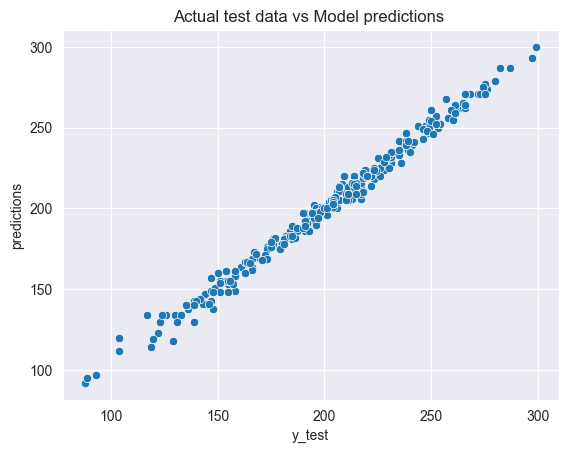

In [25]:
# Regression Score of the model
print('Score For Train Data : {}'.format(DTR.score(X_train,y_train)))
print('Score For Test Data : {}'.format(DTR.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred2))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred2))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('\n')
# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred2);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

In [26]:
#Random Forest Regression Model
# create regressor object
RFreg = RandomForestRegressor(n_estimators = 100)

# fit the regressor with x and y data
RFreg.fit(X_train,y_train) 
# predict the values for test data
pred3 = RFreg.predict(X_test)

Score For Train Data : 0.99946289717998
Score For Test Data : 0.9975300966922582
The mean absolute error: 1.4523333333333333
The mean squared error: 4.100989333333334
The root mean squared error: 2.025089956849654




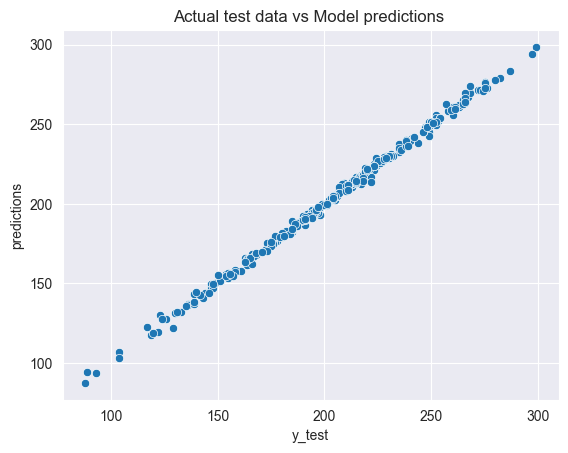

In [27]:
# Regression Score of the model
print('Score For Train Data : {}'.format(RFreg.score(X_train,y_train)))
print('Score For Test Data : {}'.format(RFreg.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred3))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred3))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('\n')
# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred3);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

In [28]:
#KNN Regression Model
# create KKNeighborsRegressor object with initial value of n =2
KNneigh = KNeighborsRegressor(n_neighbors=2)

# fit the regressor with x and y data
KNneigh.fit(X_train,y_train)
# predict the values for test data
pred4 = KNneigh.predict(X_test)

Score For Train Data : 0.9989858658524658
Score For Test Data : 0.997928190812502
The mean absolute error: 1.3933333333333333
The mean squared error: 3.44
The root mean squared error: 1.8547236990991407




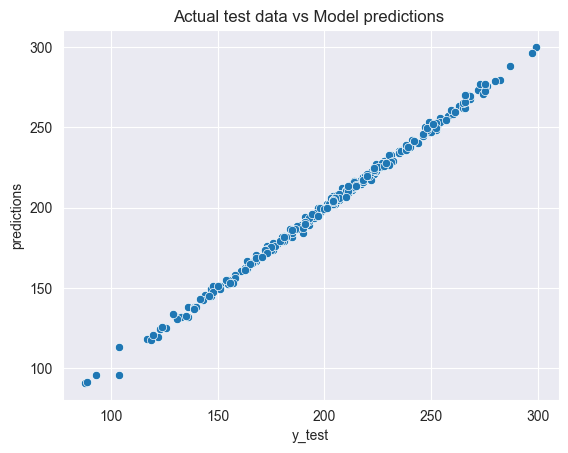

In [29]:
# Regression Score of the model
print('Score For Train Data : {}'.format(KNneigh.score(X_train,y_train)))
print('Score For Test Data : {}'.format(KNneigh.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred4))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred4))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred4)))
print('\n')
# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred4);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()